In [1]:
#question 1
recall = 355/(355+45)
precision = 355/(355+1480)
f1 = 2*((precision*recall)/(precision+recall))
f1 

0.3176733780760626

In [2]:
import pandas as pd
import numpy as np
import io

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Data_for_UCI_named.csv to Data_for_UCI_named (1).csv


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['Data_for_UCI_named.csv']))
data.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
# dropping the stab column since stab is same as stabf
data.drop(["stab"],axis=1, inplace=True)
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [7]:
# label encoding the target variable
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
data["stabf"] = encoder.fit_transform(data["stabf"])
data["stabf"].unique()

array([1, 0])

In [8]:
#splinting the data into training and testing sets
X = data.drop(columns="stabf")
y = data['stabf']


In [9]:
#standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [11]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (8000, 12)
y_train: (8000,)
x_test: (2000, 12)
y_test: (2000,)


In [12]:
#importing random forest and fitting the train data
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification
Rclf = RandomForestClassifier( random_state=1)
Rclf.fit(x_train, y_train )


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [13]:
#making prediction with random forest
from sklearn.metrics import accuracy_score, f1_score, recall_score
y_pred = Rclf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))

Accuracy: 0.929
F1 Score: 0.9455521472392638
Recall: 0.9572981366459627


In [14]:
#importing extra trees and fitting the train data
from sklearn.ensemble import ExtraTreesClassifier
Eclf = ExtraTreesClassifier(random_state=1)
Eclf.fit(x_train, y_train )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [15]:
# Question 18
# making prediction with extra tree before tuning
y_pred1 = Eclf.predict(x_test)
print("Accuracy1:", accuracy_score(y_test, y_pred1))
print("F1 Score:",f1_score(y_test,y_pred1))
print("Recall:", recall_score(y_test,y_pred1))

Accuracy1: 0.928
F1 Score: 0.9455370650529501
Recall: 0.9704968944099379


In [16]:
#Question 17
#tuning the parameters
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50,100,300, 500, 1000]
min_samples_split = [2,3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split,'max_features': max_features}
RCV = RandomizedSearchCV(Eclf,hyperparameter_grid, scoring = 'accuracy',cv=5, n_iter=10, n_jobs = -1, verbose = 1,random_state=1 )
RSC_result = RCV.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


In [17]:
# making prediction with randomized
y_pred2 = RSC_result.predict(x_test)
print("Accuracy2:", accuracy_score(y_test, y_pred2))
print("F1 Score2:",f1_score(y_test,y_pred2))
print("Recall2:", recall_score(y_test,y_pred2))

Accuracy2: 0.927
F1 Score2: 0.9441896024464832
Recall2: 0.9588509316770186


In [18]:
# summarize result
print('Best Score: %s' % RSC_result.best_score_)
print('Best Hyperparameters: %s' % RSC_result.best_params_)

Best Score: 0.9241249999999999
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


In [19]:
# Question 20
import numpy as np
import matplotlib.pyplot as plt
extra_tree_forest = ExtraTreesClassifier() 
# Training the model
extra_tree_forest.fit(x_train, y_train)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_],axis = 0)


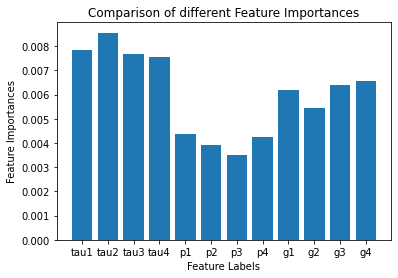

In [20]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [21]:
#importing xgboost and fitting the train data
from xgboost import XGBClassifier
Xclf = XGBClassifier(random_state=1)
Xclf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
# making predictions with xgboost
y_pred3 = Xclf.predict(x_test)
print("Accuracy3:", accuracy_score(y_test, y_pred3))
print("F1 Score3:",f1_score(y_test,y_pred3))
print("Recall3:", recall_score(y_test,y_pred3))

Accuracy3: 0.9195
F1 Score3: 0.9388530193695404
Recall3: 0.9596273291925466


In [23]:
# importing lightgbm and fitting the data
from lightgbm import LGBMClassifier
Lclf = LGBMClassifier(random_state=1)
Lclf.fit(x_train, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [24]:
# making predictions with lightgbm
y_pred4 = Lclf.predict(x_test)
print("Accuracy4:", accuracy_score(y_test, y_pred4))
print("F1 Score4:",f1_score(y_test,y_pred4))
print("Recall4:", recall_score(y_test,y_pred4))

Accuracy4: 0.9475
F1 Score4: 0.9595687331536389
Recall4: 0.967391304347826
